<a href="https://colab.research.google.com/github/disha-ramchandani/Gold-Price-Prediction/blob/main/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 7.4 MB/s 
     |████████████████████████████████| 9.8 MB 40.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from google.colab import files

file = files.upload()

Saving gold_data.csv to gold_data.csv


In [ ]:
df_gold=pd.read_csv('gold_data.csv') 
df_gold.dropna()
print("Shape of dataset", df_gold.shape)

Shape of dataset (1718, 7)


In [ ]:
df_gold.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,15-12-2011,154.740005,154.949997,151.710007,152.330002,152.330002,21521900
1,16-12-2011,154.309998,155.369995,153.899994,155.229996,155.229996,18124300
2,19-12-2011,155.479996,155.860001,154.360001,154.869995,154.869995,12547200
3,20-12-2011,156.820007,157.429993,156.580002,156.979996,156.979996,9136300
4,21-12-2011,156.979996,157.529999,156.130005,157.160004,157.160004,11996100


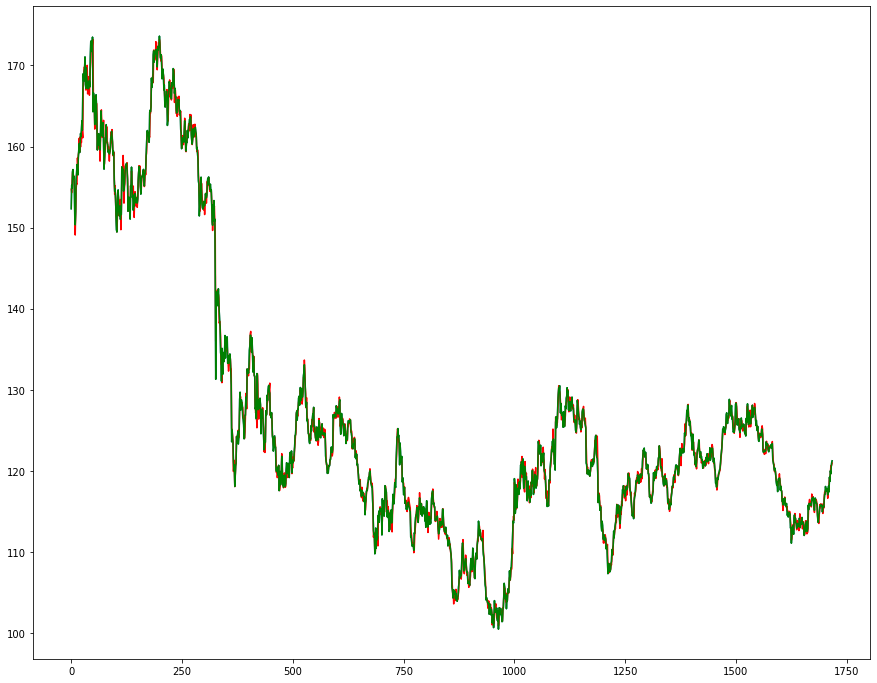

In [ ]:
df_gold['Close'].plot(figsize=(15,12))
plt.plot(df_gold.Open,color='red')
plt.plot(df_gold.Close,color='green')

In [23]:
from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
  dftest = adfuller(dataset, autolag="AIC")
  print("ADF: ", dftest[0])
  print("Pvalues: ", dftest[1])
  print("Number of lags: ", dftest[2])


In [26]:
print("For Opening Values ")
ad_test(df_gold['Open'])
print('\n')
print("For Closing Values ")
ad_test(df_gold['Close'])


For Opening Values 
ADF:  -1.8463008423644867
Pvalues:  0.3577287558336919
Number of lags:  0


For Closing Values 
ADF:  -1.8234601291067787
Pvalues:  0.3688781538232951
Number of lags:  1
